In [120]:
import numpy as np
import pandas as pd

In [121]:
df = pd.read_csv("./Dataset/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [122]:
Y = df['HeartDisease']
df.drop(columns='HeartDisease', inplace=True)

In [123]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 79.0+ KB


## *Converting the Categorical Values to Integers*
1. Sex 
2. ChestPainType
3. RestingECG
4. ExerciseAngina
5. ST_Slope

In [125]:
Gender = pd.get_dummies(df['Sex']).drop(columns='F')
df.drop(columns='Sex', inplace=True)
df['Sex'] = Gender

In [126]:
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,1


In [127]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [128]:
ChestPainType = { 0 : 'ASY', 1 : 'NAP', 2 : 'ATA', 3 : 'TA' }


def Cat2Int(Arr_dict, Col):
    for i,val in Arr_dict.items():
        df[Col].replace(val, i, inplace=True)
        

Cat2Int(ChestPainType, "ChestPainType")
df.head()
        

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex
0,40,2,140,289,0,Normal,172,N,0.0,Up,1
1,49,1,160,180,0,Normal,156,N,1.0,Flat,0
2,37,2,130,283,0,ST,98,N,0.0,Up,1
3,48,0,138,214,0,Normal,108,Y,1.5,Flat,0
4,54,1,150,195,0,Normal,122,N,0.0,Up,1


In [129]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [130]:
RestingECG = { 0 : 'Normal', 1 : 'LVH', 2 : 'ST'}

Cat2Int(RestingECG, "RestingECG")
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex
0,40,2,140,289,0,0,172,N,0.0,Up,1
1,49,1,160,180,0,0,156,N,1.0,Flat,0
2,37,2,130,283,0,2,98,N,0.0,Up,1
3,48,0,138,214,0,0,108,Y,1.5,Flat,0
4,54,1,150,195,0,0,122,N,0.0,Up,1


In [131]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [132]:
ST_Slope = { 0 : 'Flat', 1 : 'Up', 2 : 'Down'}

Cat2Int(ST_Slope, 'ST_Slope')
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex
0,40,2,140,289,0,0,172,N,0.0,1,1
1,49,1,160,180,0,0,156,N,1.0,0,0
2,37,2,130,283,0,2,98,N,0.0,1,1
3,48,0,138,214,0,0,108,Y,1.5,0,0
4,54,1,150,195,0,0,122,N,0.0,1,1


In [136]:
ExerciseAngina = pd.get_dummies(df['ExerciseAngina']).drop(columns='N')
df.drop(columns='ExerciseAngina', inplace=True)
df['ExerciseAngina'] = ExerciseAngina
df

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,Sex,ExerciseAngina
0,40,2,140,289,0,0,172,0.0,1,1,0
1,49,1,160,180,0,0,156,1.0,0,0,0
2,37,2,130,283,0,2,98,0.0,1,1,0
3,48,0,138,214,0,0,108,1.5,0,0,1
4,54,1,150,195,0,0,122,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,3,110,264,0,0,132,1.2,0,1,0
914,68,0,144,193,1,0,141,3.4,0,1,0
915,57,0,130,131,0,0,115,1.2,0,1,1
916,57,2,130,236,0,1,174,0.0,0,0,0


In [138]:
df.describe()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,Sex,ExerciseAngina
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.748366,132.396514,198.799564,0.233115,0.592593,136.809368,0.887364,0.567538,0.789760,0.404139
std,9.432617,0.931031,18.514154,109.384145,0.423046,0.793670,25.460334,1.066570,0.618959,0.407701,0.490992
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,0.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.600000,0.000000,1.000000,0.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.500000,1.000000,1.000000,1.000000
max,77.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,6.200000,2.000000,1.000000,1.000000


In [140]:
X = df
X.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,Sex,ExerciseAngina
0,40,2,140,289,0,0,172,0.0,1,1,0
1,49,1,160,180,0,0,156,1.0,0,0,0
2,37,2,130,283,0,2,98,0.0,1,1,0
3,48,0,138,214,0,0,108,1.5,0,0,1
4,54,1,150,195,0,0,122,0.0,1,1,0


In [142]:
import seaborn as sns
from matplotlib import pyplot as plt

<AxesSubplot:>

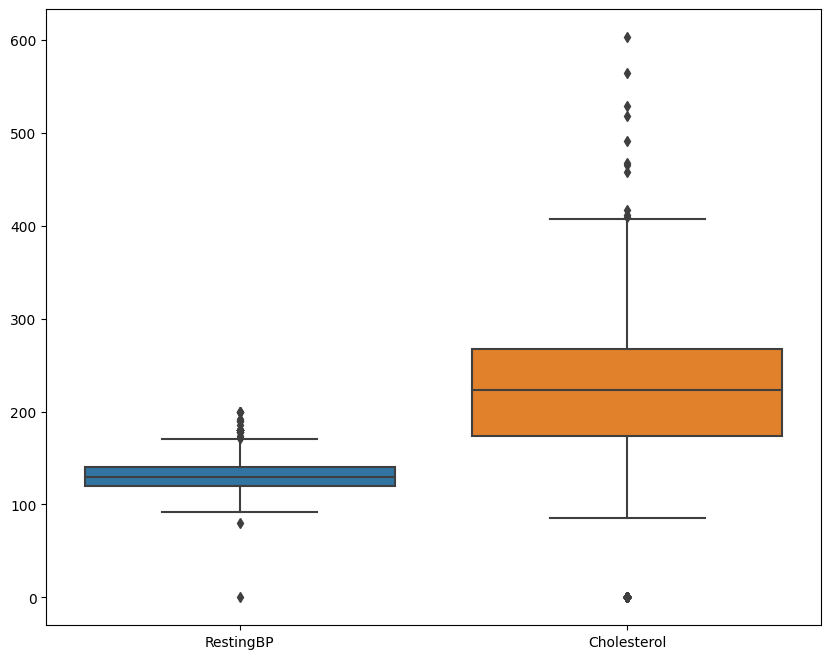

In [158]:
plt.figure(figsize=(10,8))
sns.boxplot(df[['RestingBP','Cholesterol']])


<AxesSubplot:>

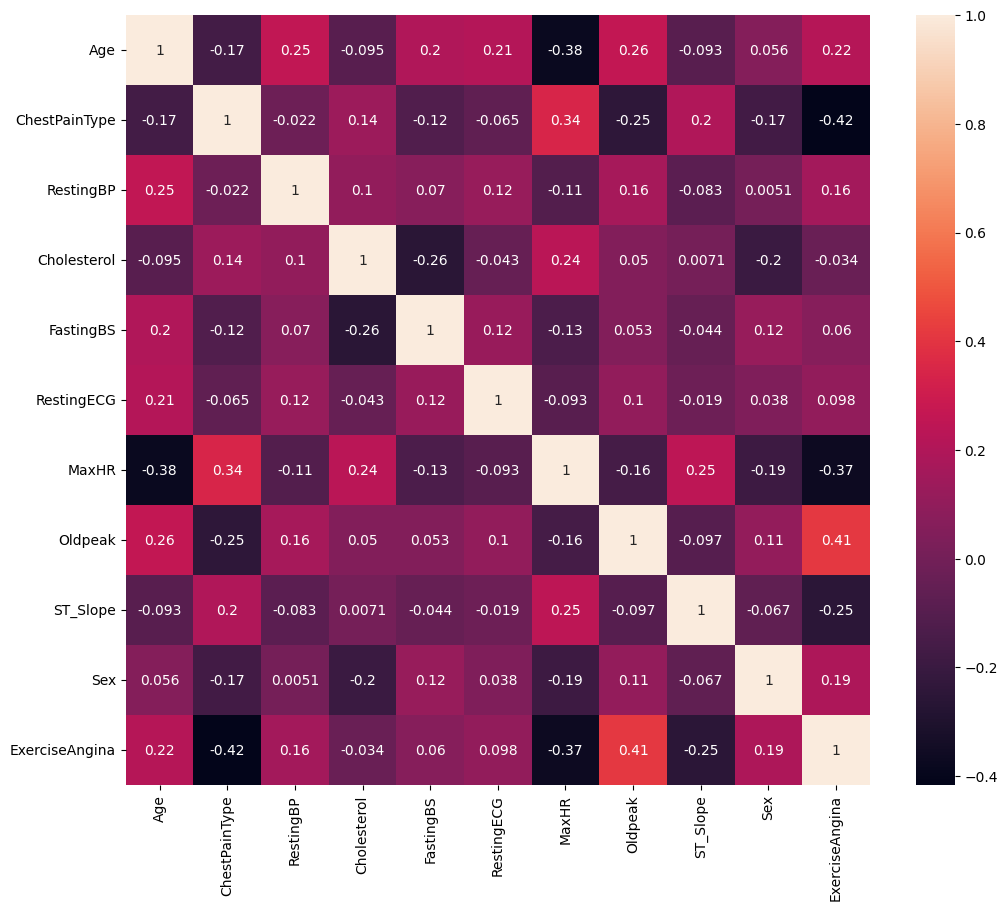

In [162]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=True)

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [173]:
from sklearn.model_selection import StratifiedKFold

In [174]:
skf = StratifiedKFold(10)

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [176]:
score_rf = []
score_lr = []
score_nb = []
score_knn = []

def scores(model, Train_X, Test_X, Train_Y, Test_Y):
    model.fit(Train_X, Train_Y)
    return model.score(Test_X, Test_Y)

     

In [ ]:

for ktrain_index, ktest_index in skf.split(X_train):
    X_ktrain, X_ktest, Y_ktrain, Y_ktest = X_train[ktrain_index], X_train[ktest_index], Y_train[ktrain_index], Y_train[ktest_index]